# Imports

In [80]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from typing import *

# 3 K-Nearest Neighbors (KNN)

## What is KNN ?

Let’s first start by establishing some definitions and notations. We will use $x$ to denote a *feature* (aka. predictor, attribute) and $y$ to denote the *target* (aka. label, class) we are trying to predict.

KNN falls in the **supervised learning** family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h:X→Y$ so that given an unseen observation $x, h(x)$ can confidently predict the corresponding output $y$.

## Introduction

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. Instances given as $x = <a_1(x),a_2(x),...,a_n(x)>$ are represented as points in the n-dimensional space $\mathbb{R}^n$. Their relationships/distances can be formulated as the euclidean distance:

\begin{equation}
d(x_i,x_j) \equiv \sqrt{\sum_{r=1}^{n} (a_r(x_i) - a_r(x_j))^2}
\end{equation}

In this case the distance metric is chosen to be the Euclidean distance, that is a popular choice. Other distance metrics may be more suitable for a given setting, including the Manhatten, Chebyshev and Hamming distance. 

A function $h$ is then learned from $\mathbb{R}^n$ $\rightarrow$ $V$, $V$ being a finite set of all possible classes. 

### Algorithm

For every given instance $x_i$ add it to the list of training_examples. 

**Inference:**

A new instance $x_q$ needs to be classified and $x_1,...,x_k$ are the $k$ closest instances to $x_q$ (known after computing all distances between training examples and the new instance). Note that $K$ is usually odd to prevent tie situations.
Then the new classification of $x_q$ is given by:

\begin{equation}
h(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k}\delta (v,y_i)
\end{equation}

with 
\begin{equation}
\delta (a,b) = \begin{cases}
1, \text{if } a=b \\
0, else
\end{cases}
\end{equation}
 
### Example: 

Classification with $K=5$:

<img src="images/knn_5.png" width="800">

__$\rightarrow$The new instance is classified as a square.__

Classification with $K=1$:
<img src="images/knn_1.png" width="800">

__$\rightarrow$The new instance is classified as a triangle.__ 




If $k = 1$ the decision boundaries will end up being the same as in a [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) diagram. Whereas using circles the perspective is to find the next K nearest points to the new instance, a Voronoi shows regions, in which new instances are assigned to the known data points. (The perspective is now on the squares and triangles that will assign new points next to them to their class.)

**Additional Information:**

- In general it is often useful to normalize the input vectors so that input dimensions are not skewed so much.

- There is the possibility to use distance based weights for instances rather than uniformly taking known instances into consideration. Therefore the equation given above changes to:

    \begin{equation}
    f(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k} w_i \delta (v,c(x_i))
    \end{equation}

    and the weights are given by:

    \begin{equation}
     w_i \equiv \frac{1}{d(x_q,x_i)^2}
    \end{equation}
    
- __Cover and Hart 1967__: As $n \rightarrow \infty$, the 1-NN error is no more than twice the error of the Bayes Optimal classifier.(Similar guarantees hold for k>1.) [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- __Curse of dimensionality__: The inductive bias the K-NN algorithm makes is, that similar points share labels. In high dimensional spaces this assumption holds not as good as lower dimensional spaces. This is because, points are not close to each other if drawn uniformly in every dimension. See also: [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- Reduce high dimensional data by PCA or SVD, intrinsic dimensions of the data should be lower dimensional or do not make use of all dimensions the data is given in

- K-NN algorithm becomes slow as n or the dimensions d increase, not feasible inference time

- K-NN algorithm becomes more accurate as n increases

## 3.1 Load the datasets

<div class="alert alert-block alert-success">
<b>Task:</b> Load the prepared datasets training and test set, because we are only going to use GridSearchCV

</div>

In [81]:
# Load the prepared datasets training and test set, because we are only going to use GridSearchCV

x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

# STUDENT CODE HERE (2pt)

# import prepared data
filename_train = 'data/train_prepared.csv'
filename_test = 'data/test_prepared.csv'
train = pd.read_csv(filename_train)
test = pd.read_csv(filename_test)

x_train = train.drop(['Survived'], 1)
y_train = train['Survived']
x_test = test.drop(['Survived'], 1)
y_test = test['Survived']

# STUDENT CODE until HERE

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


<div class="alert alert-block alert-success">
<b>Task:</b> Normalize the data with MinMaxScaling. Please use the formula and ensure that the data type is still a Pandas dataframe due to visualization later in this notebook __(Do not use MinMaxScaler!)__. Take care if variable names are the same and the cell is executed several times.
</div>

In [82]:
# Normalize the data

# STUDENT CODE HERE (1pt)
full_x_data = [x_train, x_test]
for dataset in full_x_data:
    for col in dataset:
        # covert values to float as values will be between 0 and 1 
        dataset[col] = dataset[col].astype(float)
        min = dataset[col].min()
        max = dataset[col].max()
        # calculate new values
        dataset[col] = dataset[col].apply(lambda x: (x - min) / (max - min))
        
# STUDENT CODE until HERE


In [83]:
# Imports the necessary modules

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from matplotlib.colors import ListedColormap
num_neighbors = 1
radius = 100

"The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights." [Source](https://scikit-learn.org/stable/modules/neighbors.html)

In [84]:
neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
neigh.fit(x_train, y_train)

neigh_r = RadiusNeighborsClassifier(radius)
neigh_r.fit(x_train, y_train)

print(f'Test score of K-Nearest Neighbor: {neigh.score(x_test, y_test)}')
print(f'Test score of K-Nearest Neighbor with radius: {neigh_r.score(x_test, y_test)}')

Test score of K-Nearest Neighbor: 0.784688995215311
Test score of K-Nearest Neighbor with radius: 0.6363636363636364


## 3.2 Optimization

In [85]:
from sklearn.model_selection import GridSearchCV

### 3.2.1 Find the optimal number of neighbors for the Conventional Classifier (KNN)

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Optimize not only with respect to one, but two parameters
<li> Optimize the k in nearest_n_arr as well as the weight distribution.
<li> Use GridSearchCV and a dictionary for k_params (In the KNN task you do not need to use StratifiedKfold, just use the parameter cv, which does a stratisfied fold but without the random_state parameter.)

</ul>
</div>

In [86]:
# Nearest Neighbors values to optimize the model
nearest_n_arr = range(1,20)  # natural numbers

# Necessary for plotting
length_a = len(nearest_n_arr)  

k_params: Dict[str, List[Any]]
k_model: GridSearchCV

# STUDENT CODE HERE (2pt)

k_classifier=KNeighborsClassifier()
k_params={"n_neighbors": list(nearest_n_arr),
"weights":["uniform","distance"]
}


k_model=GridSearchCV(k_classifier,k_params,cv=5)

k_model.fit(x_train,y_train)

# STUDENT CODE until HERE

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

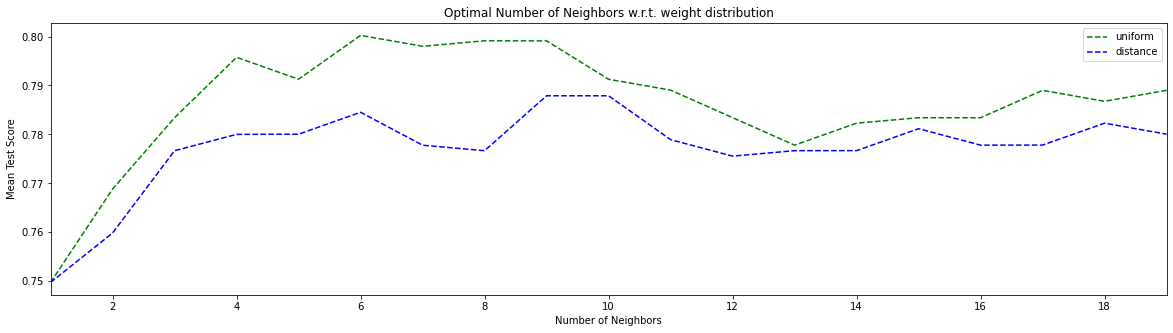

In [87]:
neighourhood = k_params['n_neighbors']
scores = k_model.cv_results_['mean_test_score']
scores_std = k_model.cv_results_['std_test_score']

# Resorting for plots
scores = np.append(scores[0::2], scores[1::2])
scores_std = np.append(scores_std[0::2], scores_std[1::2])

neighourhood = k_params['n_neighbors']

plt.figure().set_size_inches(20, 5)
plt.xlabel('Number of Neighbors')
plt.xlim(neighourhood[0],neighourhood[-1])
plt.ylabel('Mean Test Score')
plt.plot(neighourhood, scores[:length_a],'g--',
        label='uniform')
plt.plot(neighourhood, scores[length_a:]
         , 'b--',label='distance')
plt.title('Optimal Number of Neighbors w.r.t. weight distribution')
plt.legend()

### 3.2.2 Get the best model

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Get the best parameters and the correspeonding score values.
<li> Print them! 
</ul>
</div>

In [88]:
# Get the params, and the test score of the best model, print the values

# STUDENT CODE HERE (3pt)

params = k_model.best_params_
score = k_model.best_score_
print("Best parameter and score values:")
print(params)
print(score)
# STUDENT CODE until HERE

Best parameter and score values:
{'n_neighbors': 6, 'weights': 'uniform'}
0.8002448057246878


### 3.2.3 Find the optimal radius for the RadiusClassifier

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Same as before: Name it k_r_model and use k_r_params (Look at next code block for consistency)
<li> Now optimize the dictionary with radius and weights
<li> You can choose if you want decimal steps or natural numbers for radii.
</ul>
</div>

In [89]:
# Choose for different radii
radius_arr = np.arange(0.6, 1.2, 0.1)  # decimal steps
#radius_arr = range(1,10)  # natural numbers

# Necessary for plotting
length_r_a = len(radius_arr)  

k_r_params: Dict[str, List[Any]]
k_r_model: GridSearchCV

# STUDENT CODE HERE (2pt)

k_classifier=RadiusNeighborsClassifier()
k_r_params={"radius": list(radius_arr),
"weights":["uniform","distance"]
}


k_r_model=GridSearchCV(k_classifier,k_r_params,cv=5)

k_r_model.fit(x_train,y_train)

# STUDENT CODE until HERE

GridSearchCV(cv=5, estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': [0.6, 0.7, 0.7999999999999999,
                                    0.8999999999999999, 0.9999999999999999,
                                    1.0999999999999999],
                         'weights': ['uniform', 'distance']})

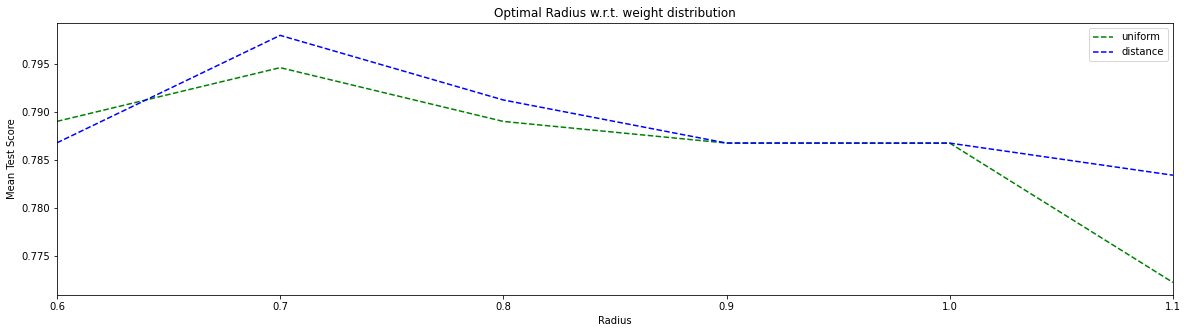

In [90]:
neighourhood_r = k_r_params['radius']
scores_r = k_r_model.cv_results_['mean_test_score']
scores_std_r = k_r_model.cv_results_['std_test_score']

scores_r = np.append(scores_r[0::2], scores_r[1::2])
scores_std_r = np.append(scores_std_r[0::2], scores_std_r[1::2])

plt.figure().set_size_inches(20, 5)
plt.title('Optimal Radius w.r.t. weight distribution')
plt.xlim(neighourhood_r[0],neighourhood_r[-1])
plt.xlabel('Radius')
plt.ylabel('Mean Test Score')
plt.plot(neighourhood_r, scores_r[:length_r_a],'g--',
        label='uniform')
plt.plot(neighourhood_r, scores_r[length_r_a:],'b--',
        label='distance')
plt.legend()

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> What happens if you take a radius of 0?
</div>

<div class="alert alert-block alert-success">
<b>Answer:UserWarning: One or more of the test scores are non-finite: [nan nan]
  category=UserWarning. sklearn realizes that im doing dumb stuff and stops me. If there is no radius every point is a class and thats pretty useless.</b></div>


<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Can you imagine why the model's accuracy stagnates at a certain radius?
</div>

<div class="alert alert-block alert-success">
<b>Answer:Because all Values are normalized so there cant be an improvement after a radius of 2</b></div>


<div class="alert alert-block alert-success">
<b>Task:</b> Change the radius array from using only natural numbers to decimal numbers like 0.6, 0.7.,... (comment out natural numbers line). Be aware that for some radii no neighbors can be found. Adjust the lower bound until there is at least one neighbor found.
</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Why does the second approach make more sense?
</div>

<div class="alert alert-block alert-success">
<b>Answer:because all values are normalized, between 0 and 1 if we raise the radius above 1 nothing changes</b></div>


### 3.2.4 Get the best model

<div class="alert alert-block alert-success">
<b>Task:</b> Get for the RadiusClassifier the best model and its parameters. Print those together with the score.
</li>
</ul>
</div>

In [91]:
# Get the params, and the test score of the best model, print the values
# STUDENT CODE HERE (3pt)

params = k_r_model.best_params_
score = k_r_model.best_score_
print("Best parameter and score values:")
print(params)
print(score)

# STUDENT CODE until HERE

Best parameter and score values:
{'radius': 0.7, 'weights': 'distance'}
0.7979662293641328


## 3.3 Compare

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Which model would you take, radius or Conventional Nearest Neighbor and why? Compare therefore the classifiers trained with the best parameter setting and the GridSearchCV results.
</div>

<div class="alert alert-block alert-success">
<b>Answer:the Conventional Nearest Neighbor has a test score of 0.8002448057246878 and works best for this dataset</b></div>


<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Are weights in both best models uniform?
</div>

<div class="alert alert-block alert-success">
<b>Answer:no for Conventional Nearest Neighbor its uniform, for the RadiusNeighborsClassifier distance is slightly better</b></div>


## 3.4 Visualization

We will take the two features of the training set and look where the decision boundaries are drawn for a KNN trained on them.

In [92]:
def plot_knn(n_neighbors: int, radius: float, f_names: List[str], X: np.ndarray, y: np.ndarray):
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])
    
    h = .02
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf_r = RadiusNeighborsClassifier(radius=radius, weights=weights, outlier_label=0)
        clf.fit(X, y)
        clf_r.fit(X,y)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z2 = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z2 = Z2.reshape(xx.shape)
         
        f,ax = plt.subplots(1,2,figsize=(20,5))
        
        ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
        sc1 = ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)

        ax[0].set_xlim(xx.min(), xx.max())
        ax[0].set_ylim(yy.min(), yy.max())
        ax[0].set_xlabel(f_names[0])
        ax[0].set_ylabel(f_names[1])
        ax[0].set_title(f'K-Nearest Neighbor with (k={n_neighbors}, weights = \'{weights}\')')
        f.colorbar(sc1,ax = ax[0]) 
        
        ax[1].pcolormesh(xx, yy, Z2, cmap=cmap_light)
        sc2 = ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        
        ax[1].set_xlim(xx.min(), xx.max())
        ax[1].set_ylim(yy.min(), yy.max())
        ax[1].set_xlabel(f_names[0])
        ax[1].set_ylabel(f_names[1])
        ax[1].set_title(f'Radius Neighbors Classifier with (R= {radius:0.3f}, weights = \'{weights}\')')
        f.colorbar(sc1, ax = ax[1]) 
       
    plt.show()

In [93]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length',
       'Fare_log', 'Fare_bin'],
      dtype='object')

In [94]:
# Reconsider all features we have
x_train.columns
#print(y_train.head(5))

Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Name_length', 'Fare_log',
       'Fare_bin'],
      dtype='object')

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either spec

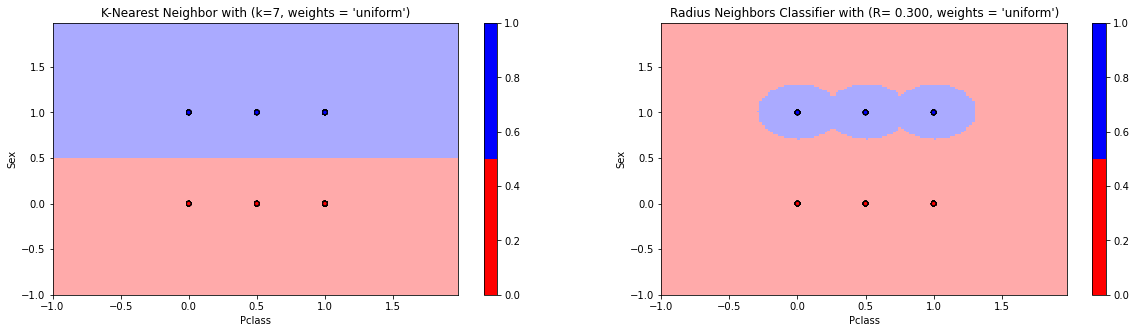

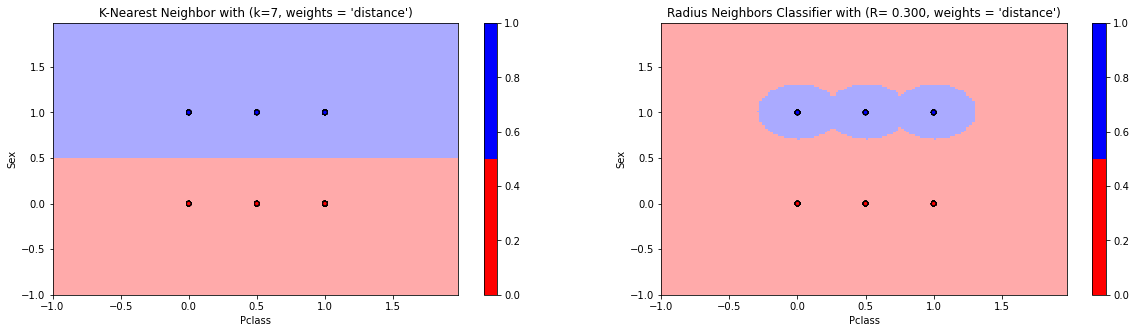

In [95]:
# Choose features to compare
features_compared = ['Pclass', 'Sex']

# Plot them
plot_knn(7, 0.3, features_compared, np.array(x_test[features_compared]), y_test.values)

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Which features were compared in the default setting?
</div>

<div class="alert alert-block alert-success">
<b>Answer:'Pclass', 'Sex'</b></div>

<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Why are there in the default setting only 6 points?
</div>

<div class="alert alert-block alert-success">
<b>Answer:because we got 3 classes and 2 genders 2*3=6 jai:)</b></div>


<div class="alert alert-block alert-success">
<b>Question (1pt):</b> Are previous determined optimal values for KNN and RNN (via GridSearchCV) reliable for these plots?
</div>

<div class="alert alert-block alert-success">
<b>Answer:yes they work pretty good</b></div>


<div class="alert alert-block alert-success">
<b>Question (1pt):</b>  What happens to the decision boundaries as you increase k? You might change the features to see it.
</div>

<div class="alert alert-block alert-success">
<b>Answer:They move in the direction of more people being dead</b></div>


<div class="alert alert-block alert-success">
<b>Task:</b> Plot continous features if possible.
</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Task:</b> Leave out normalization right at the beginning of this Task.
</li>
</ul>
</div>

<div class="alert alert-block alert-success">
<b>Question (1pt):</b>  Is it a good idea not to normalize?
</div>

<div class="alert alert-block alert-success">
<b>Answer:No all scores drop by a bit and normalizing is pretty easy so ... we just do it </b></div>


## 3.5 Visualization by different methods

Below there are used some ways to visualize data in higher dimensions, since we were looking with the knn_plots only at two dimensions.

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_blobs

from pandas.plotting import parallel_coordinates

### 3.5.1 Dimensionality Reduction with PCA

Can be used as well for preprocessing purposes (also with K-NNs), but is only used for visualization purposes in here.

In [97]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_train))

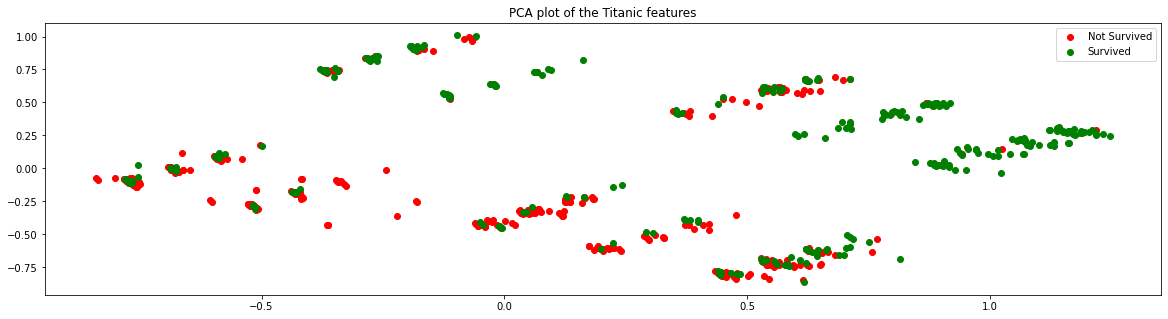

In [98]:
plt.figure(figsize=(20,5))
plt.scatter(transformed[y_train==0][0], transformed[y_train==0][1], label='Not Survived', c='red')
plt.scatter(transformed[y_train==1][0], transformed[y_train==1][1], label='Survived', c='green')
plt.title('PCA plot of the Titanic features')

plt.legend()
plt.show()

### 3.5.2 Parallel Coordinates

One line describes one sample in you data. By looking at 'continuous' values (more than just a handful of discrete values), you can see that long names tended to survive for example.

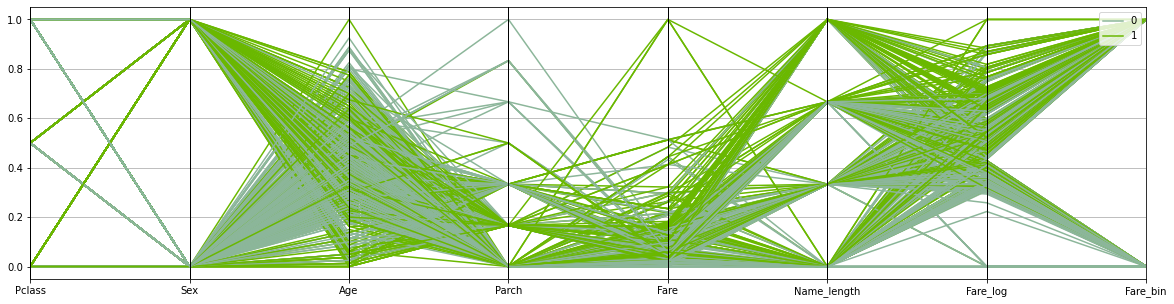

In [99]:
data_norm = pd.concat([x_train, y_train], axis=1)

# Perform parallel coordinate plot
plt.figure(figsize=(20,5))
parallel_coordinates(data_norm, 'Survived')
plt.show()

<div class="alert alert-block alert-success">
<b>Question (1pt):</b>  What happens if the data is not normalized in these methods? Check by yourself.
</div>

<div class="alert alert-block alert-success">
<b>Answer:You just dont understand a thing because everything is scaled different so you cant compare anything. The pca is higlighting the component with the largest variance for example age or Fare and components such as sex or pclass stay unrecogniced </b></div>


See also: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

# Further Reading


- Bagging
- Logistic Regression
- Random Forests
- Combination of Bagging and GridSearchCV

# Feedback and Recap

<div class="alert alert-block alert-success">
<b>Question (3pt):</b>  Please conclude in a few sentences what you learned in this exercise
</div>

<div class="alert alert-block alert-success">
<b>Answer:We learned how to import Data,kill outliers and reduce skew. Then we got to know decition tres and the Gridsearchcv which seems a pretty mighty tool. 
And in the end we learned how to use Knn with neigbours and with radius to classify data. </b></div>









